<h1><center>CSE391, Quiz 3, Spring 2108 </center></h1>



1- Read the data in file named cities. The data includes ratings for 9 different indicators of the quality of life in 329 U.S. cities. These are climate, housing, health, crime, transportation, education, arts, recreation, and economics. For each category, a higher rating is better. For example, a higher rating for crime means a lower crime rate.
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/arkwl/Desktop/Workstation/CSE391/q3/cities.csv')
df.head(10)

,cities,climate,housing,health,crime,transportation,education,art,recreation,economic
0,"Abilene, TX",521,6200,237,923,4031,2757,996,1405,7633
1,"Akron, OH",575,8138,1656,886,4883,2438,5564,2632,4350
2,"Albany, GA",468,7339,618,970,2531,2560,237,859,5250
3,"Albany-Troy, NY",476,7908,1431,610,6883,3399,4655,1617,5864
4,"Albuquerque, NM",659,8393,1853,1483,6558,3026,4496,2612,5727
5,"Alexandria, LA",520,5819,640,727,2444,2972,334,1018,5254
6,"Allentown,Bethlehem, PA-NJ",559,8288,621,514,2881,3144,2333,1117,5097
7,"Alton, Granite City, IL",537,6487,965,706,4975,2945,1487,1280,5795
8,"Altoona, PA",561,6191,432,399,4246,2778,256,1210,4230
9,"Amarillo, TX",609,6546,669,1073,4902,2852,1235,1109,6241


2-Make a boxplot to look at the distribution of the ratings data.

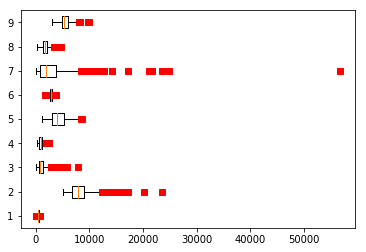

In [12]:
data = [df['climate'], df['housing'], df['health'], df['crime'], df['transportation'], df['education'], df['art'], df['recreation'], df['economic']]
plt.boxplot(data, 0, 'rs', 0)
plt.show()

3-Compute the  pairwise correlation between features, show the results using a heat map and also find two features that have highest correlation among these features

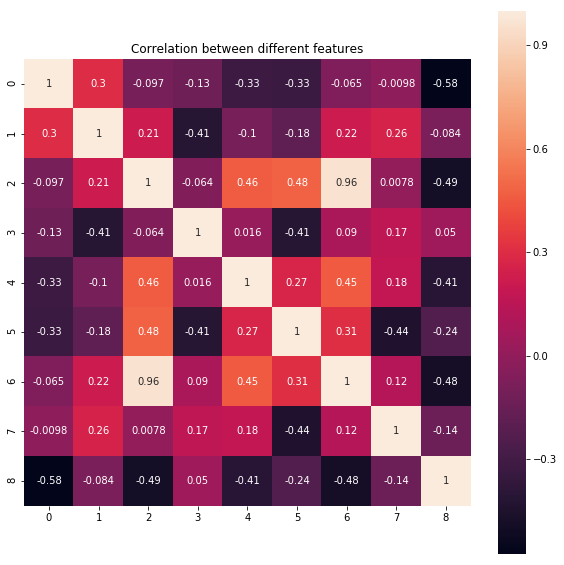

In [25]:
features = df.iloc[:,2:]

corr = df.corr()

import seaborn as sns

CorrX = np.corrcoef(corr.T)
plt.figure(figsize=(10,10))
sns.heatmap(CorrX, vmax=1, square=True,annot=True)

plt.title('Correlation between different features')

plt.show()

#climate and transportation have the highest correlation

4- Compute principal components.

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
PCs = pca.fit_transform(features)
PCs.shape


(329, 8)

 5- Use a scatter plot to to display values for  two first PCs for a set of data. Do you observe any clusters in the scatter plot. if yes what does this clustering mean?

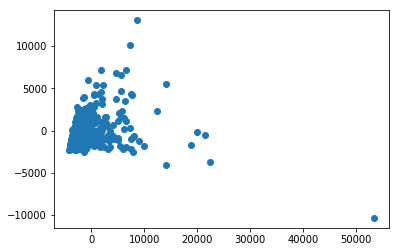

In [29]:
plt.scatter(PCs[:,0], PCs[:,1])
plt.show()
# it does show cluster

6- We would like to compress these features. If we choose only two first Pcs,
how much variance are explained by these two PCs. Reconstruct the original data 
 using these two PCs and compute the  reconstruction error

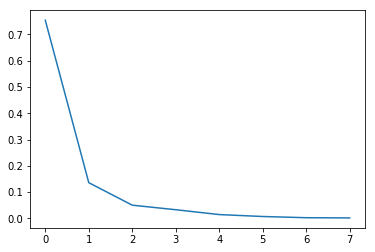

In [30]:
explained_variance = pca.explained_variance_ratio_
explained_variance

plt.plot(explained_variance)
plt.show()

In [43]:
# the variance is quite high between the first and second values. 
avg = features.mean()

reconstruct = np.dot(pca.transform(features)[:,:8], pca.components_[:8,:])
print(reconstruct.shape)
print(avg.shape)
reconstruct = reconstruct + np.ones([329, 8]) * avg

print(reconstruct[0,])

#reconstruction

(329, 8)
(8,)


Exception: Data must be 1-dimensional